In [1]:
import glob
import cv2 as cv
import numpy as np
import tensorflow as tf
import json
import joblib
from keras.models import model_from_json
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
def load_image(image_path):
    image = cv.imread(image_path)
    image = cv.resize(image, (244, 244))
    image = image / 255.0
    return image

def load_dataset():
    train_image_paths = glob.glob("Corona/Data/train/*/*")
    test_image_paths = glob.glob("Corona/Data/test/*/*")

    Xtrain, Xtest = [], []
    Ytrain, Ytest = [], []

    label_dict = {
        'PNEUMONIA': 0,
        'COVID19': 1,
        'NORMAL': 2
    }

    for train_image in train_image_paths:
        name = train_image.split('\\')[1]
        label = label_dict[name]

        image = load_image(train_image)
        Xtrain.append(image)
        Ytrain.append(label)

    for test_image in test_image_paths:
        name = test_image.split('\\')[1]
        label = label_dict[name]

        image = load_image(test_image)
        Xtest.append(image)
        Ytest.append(label)

    Xtrain = np.asarray(Xtrain)
    Xtest = np.asarray(Xtest)
    Ytrain = np.asarray(Ytrain)
    Ytest = np.asarray(Ytest)

    return Xtrain, Xtest, Ytrain, Ytest



In [3]:
# Load dataset
Xtrain, Xtest, Ytrain, Ytest = load_dataset()

In [5]:
input_shape = (244, 244, 3)

# Load model architecture from saved file
model_architecture = joblib.load("model_architecture_2.joblib")
model = tf.keras.models.model_from_json(model_architecture)

# Load model weights from saved file
model_weights = joblib.load("model_weights_2.joblib")
model.set_weights(model_weights)

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(Xtest, Ytest)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 721ms/step - accuracy: 0.9625 - loss: 0.1797
Test Loss: 0.2510320544242859
Test Accuracy: 0.9534161686897278


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 762ms/step


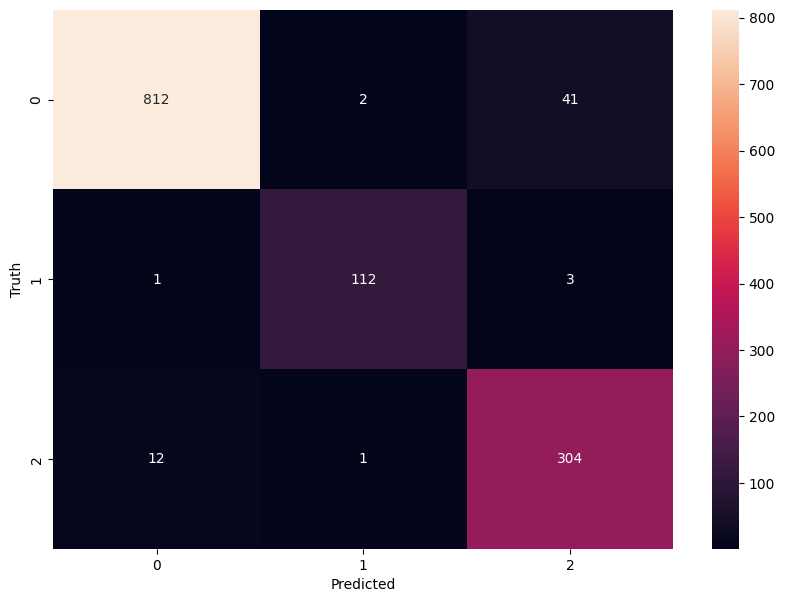

In [8]:
Ptest = model.predict(Xtest)
Ptest = np.argmax(Ptest, axis=1)

cm = confusion_matrix(Ytest, Ptest)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()